In [1]:
pip install python-ternary

Note: you may need to restart the kernel to use updated packages.


In [4]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

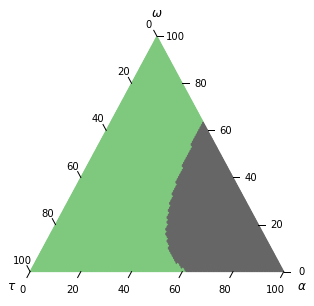

In [5]:
# https://github.com/marcharper/python-ternary/blob/master/examples/Ternary-Examples.ipynb

def r_thresh(p):
    params = {}
    params['r'] = 0.8572
    params['mu'] = 0.2930
    params['gamma'] = 1
    params['nu'] = 2.3774
    params['beta'] = 0.9
    
    params['alpha'] = p[0]
    params['omega'] = p[1]
    params['tau'] = p[2]

    params['delta'] = params['mu'] + params['gamma']*params['tau'] + params['nu']*params['omega']

    r_crit_frac = np.exp(params['mu']) / (np.exp(params['delta']) - 1)
    r_crit_term1 = np.exp(params['gamma']*params['tau'])
    r_crit_term2 = np.exp(params['alpha']*params['beta'] + params['gamma']*params['tau'])
    r_crit_term3 = np.exp(params['alpha']*params['beta'] + params['delta'])
    
    r_crit = r_crit_frac*(r_crit_term1 - r_crit_term2 + r_crit_term3 - 1) - 1
    return 1*(params['r'] > r_crit)

figure, tax = ternary.figure(scale=100)
figure.set_size_inches(5, 5)
tax.heatmapf(r_thresh, boundary=True, style="h", colorbar=False, cmap='Accent_r')
tax.right_corner_label(r"$\alpha$", fontsize=12)
tax.top_corner_label(r"$\omega$", fontsize=12)
tax.left_corner_label(r"$\tau$", fontsize=12)
tax.ticks(axis='lbr', multiple=20, linewidth=1, offset=0.025)
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

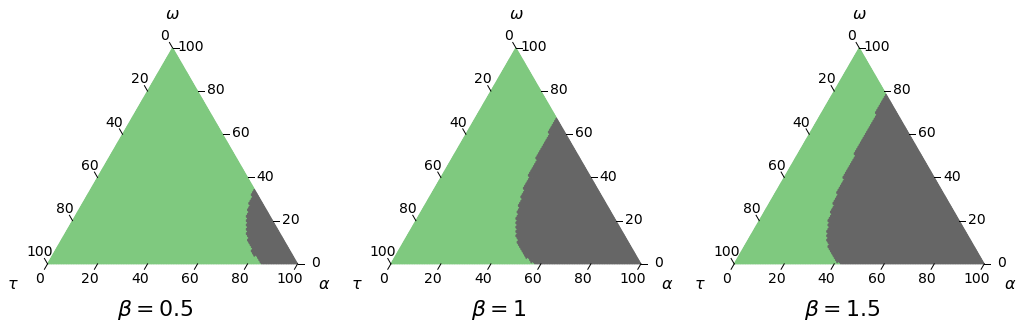

In [39]:
# https://github.com/marcharper/python-ternary/blob/master/examples/Ternary-Examples.ipynb
fig, ax = plt.subplots(1,3)

for n, b in enumerate([0.5, 1, 1.5]): 
    def r_thresh(p):
        params = {}
        params['r'] = 0.8572
        params['mu'] = 0.2930
        params['gamma'] = 1
        params['nu'] = 2.3774
        params['beta'] = b

        params['alpha'] = p[0]
        params['omega'] = p[1]
        params['tau'] = p[2]

        params['delta'] = params['mu'] + params['gamma']*params['tau'] + params['nu']*params['omega']

        r_crit_frac = np.exp(params['mu']) / (np.exp(params['delta']) - 1)
        r_crit_term1 = np.exp(params['gamma']*params['tau'])
        r_crit_term2 = np.exp(params['alpha']*params['beta'] + params['gamma']*params['tau'])
        r_crit_term3 = np.exp(params['alpha']*params['beta'] + params['delta'])

        r_crit = r_crit_frac*(r_crit_term1 - r_crit_term2 + r_crit_term3 - 1) - 1
        return 1*(params['r'] > r_crit)

    figure, tax = ternary.figure(ax = ax[n], scale=100)
    figure.set_size_inches(15, 5)
    tax.heatmapf(r_thresh, boundary=True, style="h", colorbar=False, cmap='Accent_r')
    tax.right_corner_label(r"$\alpha$", fontsize=16, position=(1.05,0,0))
    tax.top_corner_label(r"$\omega$", fontsize=16, offset=0.25)
    tax.left_corner_label(r"$\tau$", fontsize=16, position=(-0.08,0,0))
    tax.ticks(axis='lbr', multiple=20, linewidth=1, offset=0.025, fontsize=14)
    tax.bottom_axis_label(r"$\beta = $" + str(b), fontsize=22, offset=0.25)
    tax.get_axes().axis('off')
    tax.clear_matplotlib_ticks()
    
fig.tight_layout(pad=5.0)

In [38]:
fig.savefig('simplex.png')